<a href="https://colab.research.google.com/github/pknemi/machine-learning/blob/main/vehicle_co2_emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/co2.csv")
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [ ]:
df.shape

(7385, 12)

In [ ]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [ ]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [ ]:
df.isnull().sum()

,0
Make,0
Model,0
Vehicle Class,0
Engine Size(L),0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel Consumption City (L/100 km),0
Fuel Consumption Hwy (L/100 km),0
Fuel Consumption Comb (L/100 km),0


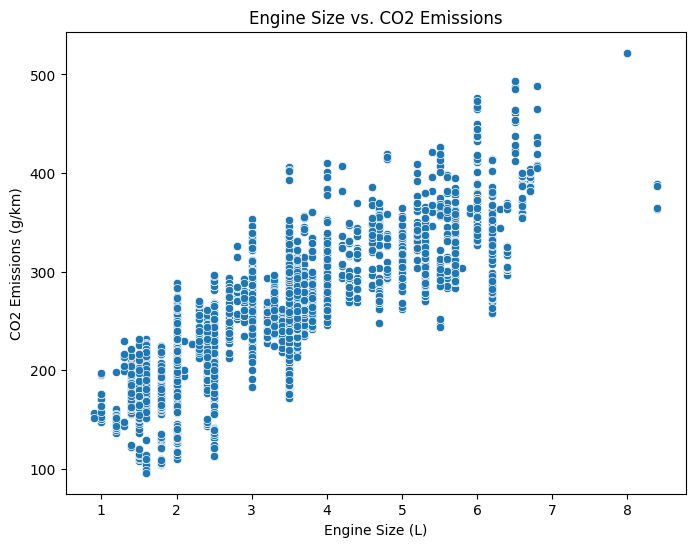

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Engine Size(L)', y='CO2 Emissions(g/km)', data=df)
plt.title('Engine Size vs. CO2 Emissions')
plt.xlabel('Engine Size (L)')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

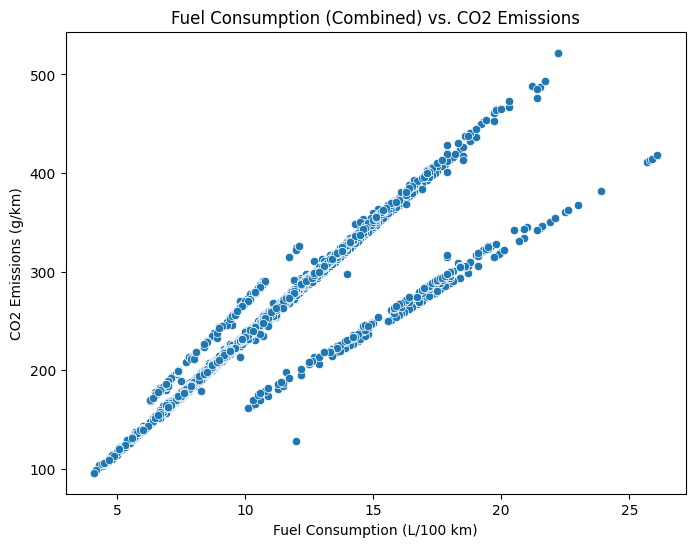

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Fuel Consumption Comb (L/100 km)', y='CO2 Emissions(g/km)', data=df)
plt.title('Fuel Consumption (Combined) vs. CO2 Emissions')
plt.xlabel('Fuel Consumption (L/100 km)')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

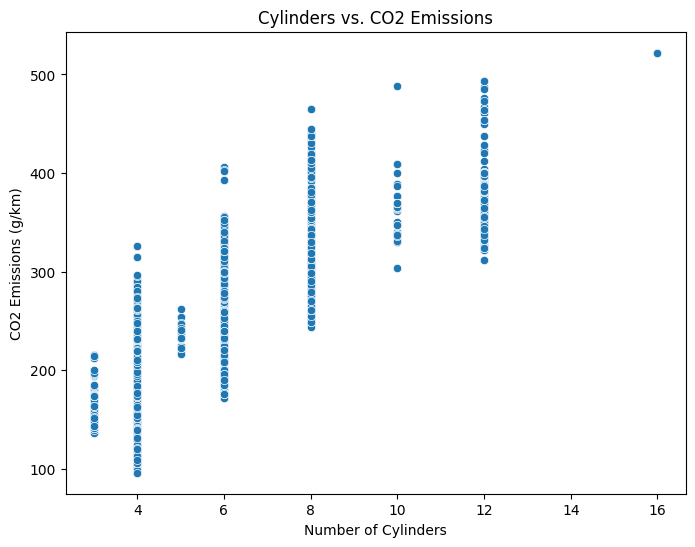

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Cylinders', y='CO2 Emissions(g/km)', data=df)
plt.title('Cylinders vs. CO2 Emissions')
plt.xlabel('Number of Cylinders')
plt.ylabel('CO2 Emissions (g/km)')
plt.show()

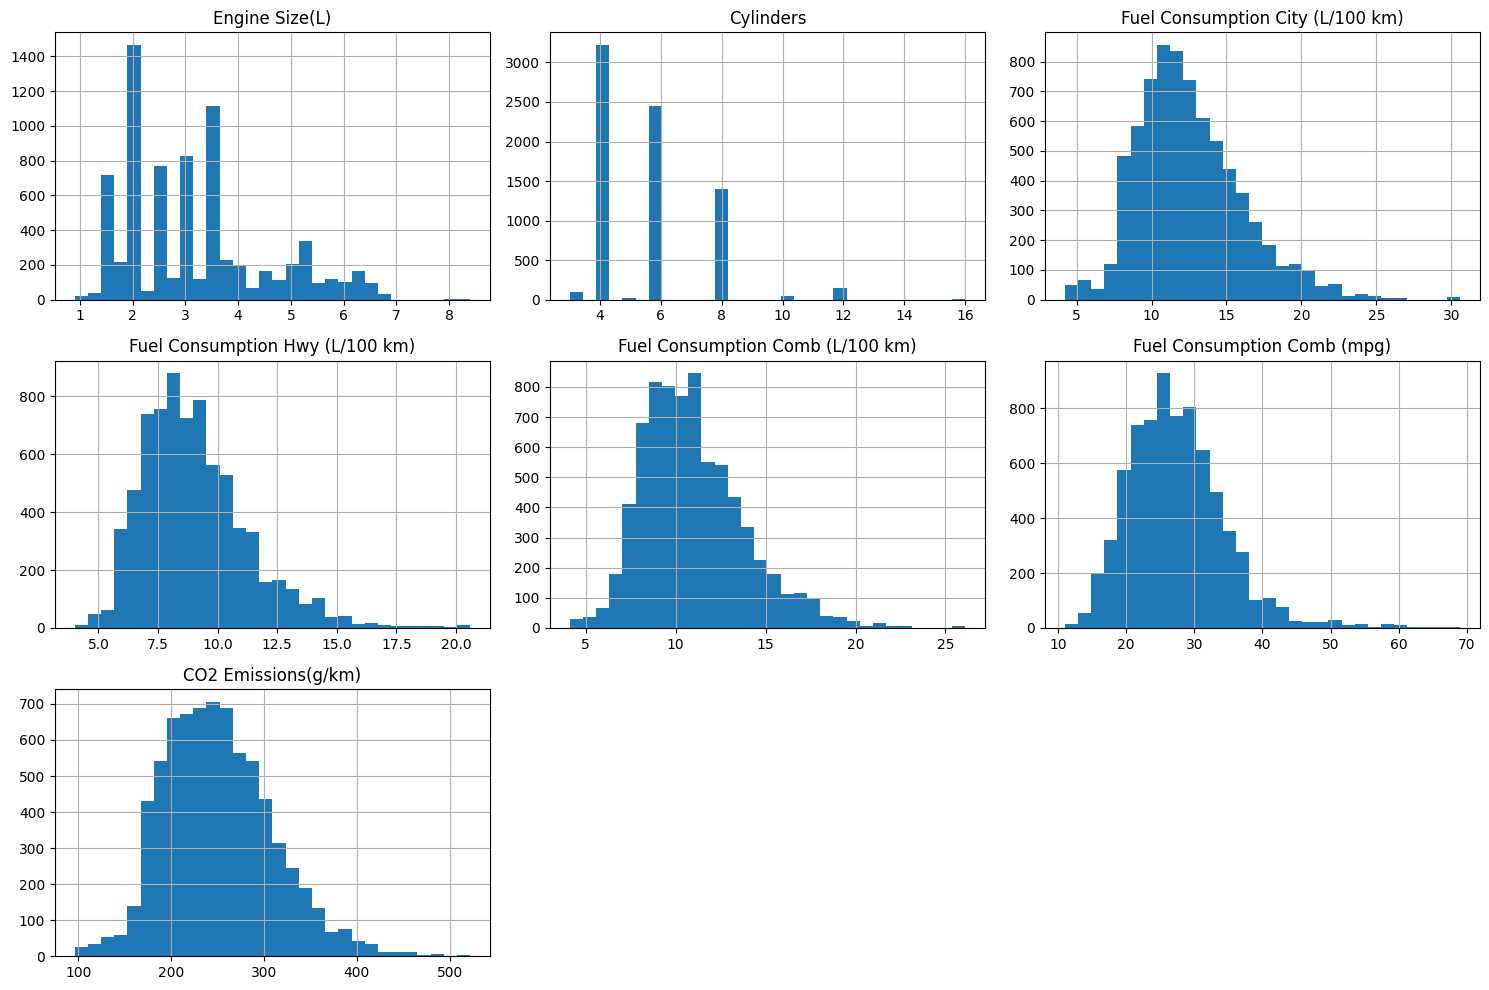

In [ ]:
#visualizing the distribution f each numerical coloumn
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

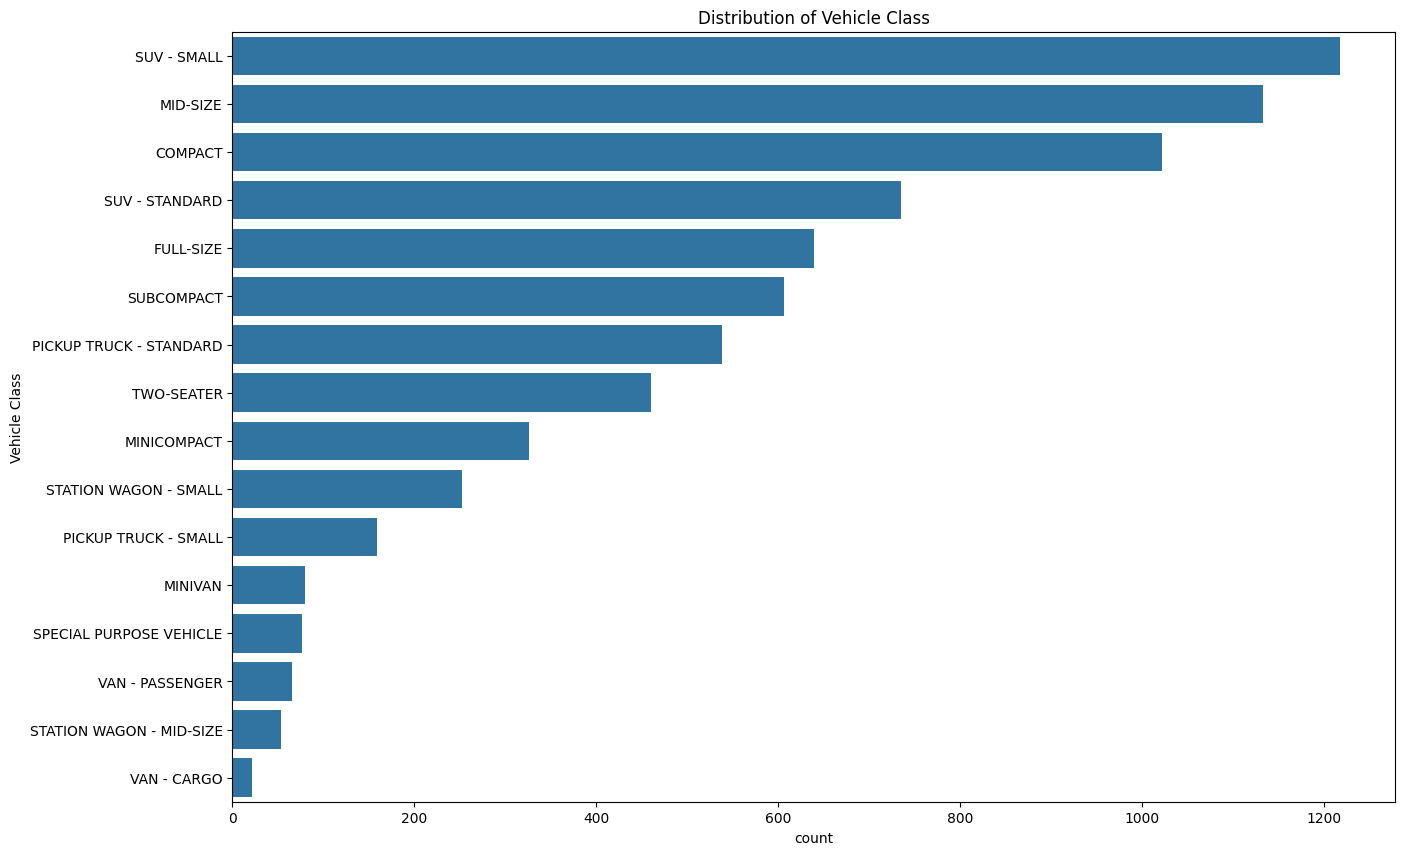

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(y='Vehicle Class', data=df, order=df['Vehicle Class'].value_counts().index)
plt.title('Distribution of Vehicle Class')
plt.show()

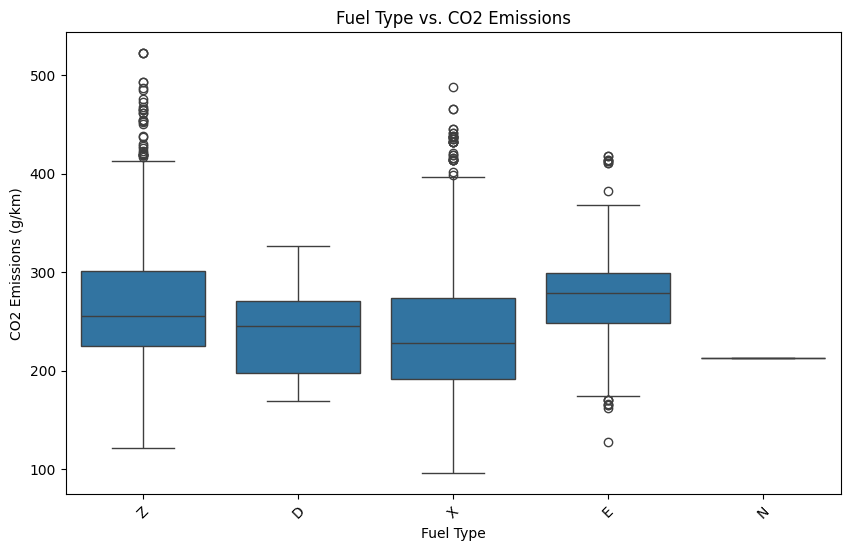

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel Type', y='CO2 Emissions(g/km)', data=df)
plt.title('Fuel Type vs. CO2 Emissions')
plt.xlabel('Fuel Type')
plt.ylabel('CO2 Emissions (g/km)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

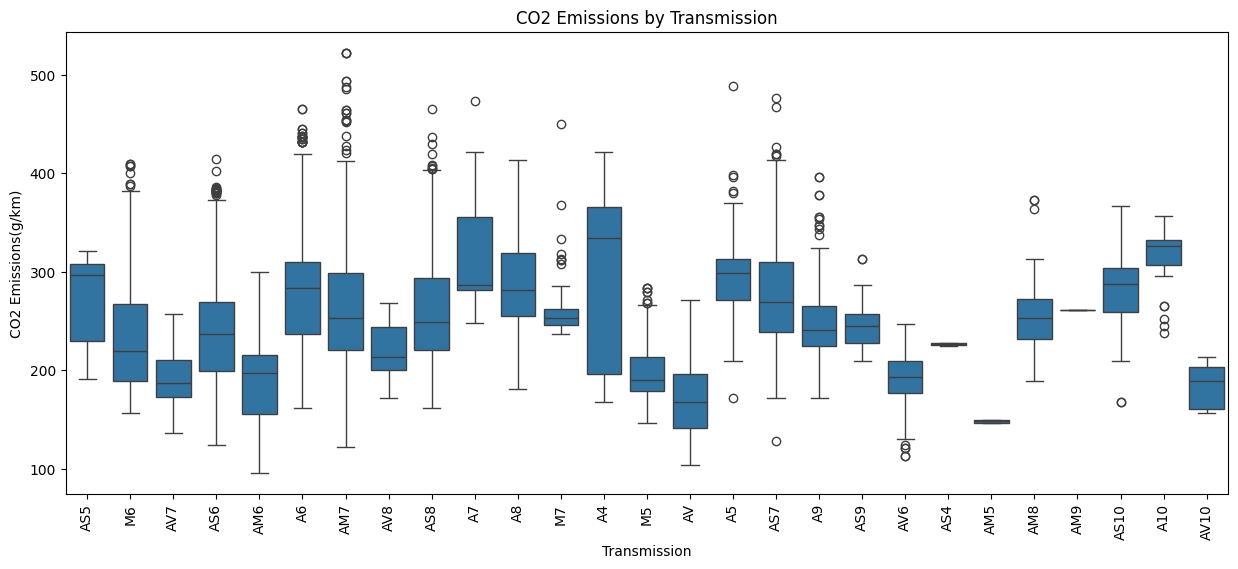

In [ ]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Transmission', y='CO2 Emissions(g/km)', data=df)
plt.xticks(rotation=90)
plt.title('CO2 Emissions by Transmission')
plt.show()

#Building modelling

In [ ]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

The most relevant indeendent features for predicting CO2 emissions are Engine size,fuel consumption,cylinders,fuel type,vehicle class.

In [ ]:
df['Vehicle Class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

#Encoding the categorical independent features

In [ ]:
import pandas as pd

# Create dummy variables for 'Fuel Type' and 'Vehicle Class'
df_encoded = pd.get_dummies(df, columns=['Fuel Type', 'Vehicle Class'], prefix=['fuel', 'vehicle_class'], drop_first=True)

# Drop original categorical columns and other irrelevant columns
df_encoded = df_encoded.drop(['Make', 'Model', 'Transmission'], axis=1)

# Display the encoded DataFrame
df_encoded.head()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),fuel_E,fuel_N,fuel_X,...,vehicle_class_PICKUP TRUCK - STANDARD,vehicle_class_SPECIAL PURPOSE VEHICLE,vehicle_class_STATION WAGON - MID-SIZE,vehicle_class_STATION WAGON - SMALL,vehicle_class_SUBCOMPACT,vehicle_class_SUV - SMALL,vehicle_class_SUV - STANDARD,vehicle_class_TWO-SEATER,vehicle_class_VAN - CARGO,vehicle_class_VAN - PASSENGER
0,2.0,4,9.9,6.7,8.5,33,196,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2.4,4,11.2,7.7,9.6,29,221,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.5,4,6.0,5.8,5.9,48,136,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3.5,6,12.7,9.1,11.1,25,255,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,3.5,6,12.1,8.7,10.6,27,244,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
df_encoded

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),fuel_E,fuel_N,fuel_X,...,vehicle_class_PICKUP TRUCK - STANDARD,vehicle_class_SPECIAL PURPOSE VEHICLE,vehicle_class_STATION WAGON - MID-SIZE,vehicle_class_STATION WAGON - SMALL,vehicle_class_SUBCOMPACT,vehicle_class_SUV - SMALL,vehicle_class_SUV - STANDARD,vehicle_class_TWO-SEATER,vehicle_class_VAN - CARGO,vehicle_class_VAN - PASSENGER
0,2.0,4,9.9,6.7,8.5,33,196,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2.4,4,11.2,7.7,9.6,29,221,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1.5,4,6.0,5.8,5.9,48,136,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3.5,6,12.7,9.1,11.1,25,255,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,3.5,6,12.1,8.7,10.6,27,244,False,False,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219,False,False,False,...,False,False,False,False,False,True,False,False,False,False
7381,2.0,4,11.2,8.3,9.9,29,232,False,False,False,...,False,False,False,False,False,True,False,False,False,False
7382,2.0,4,11.7,8.6,10.3,27,240,False,False,False,...,False,False,False,False,False,True,False,False,False,False
7383,2.0,4,11.2,8.3,9.9,29,232,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
y=df_encoded.pop('CO2 Emissions(g/km)')

In [ ]:
x=df_encoded
x

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),fuel_E,fuel_N,fuel_X,fuel_Z,...,vehicle_class_PICKUP TRUCK - STANDARD,vehicle_class_SPECIAL PURPOSE VEHICLE,vehicle_class_STATION WAGON - MID-SIZE,vehicle_class_STATION WAGON - SMALL,vehicle_class_SUBCOMPACT,vehicle_class_SUV - SMALL,vehicle_class_SUV - STANDARD,vehicle_class_TWO-SEATER,vehicle_class_VAN - CARGO,vehicle_class_VAN - PASSENGER
0,2.0,4,9.9,6.7,8.5,33,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,2.4,4,11.2,7.7,9.6,29,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,1.5,4,6.0,5.8,5.9,48,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,3.5,6,12.7,9.1,11.1,25,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
4,3.5,6,12.1,8.7,10.6,27,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
7381,2.0,4,11.2,8.3,9.9,29,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
7382,2.0,4,11.7,8.6,10.3,27,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
7383,2.0,4,11.2,8.3,9.9,29,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
x.columns

Index(['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'fuel_E', 'fuel_N', 'fuel_X', 'fuel_Z',
       'vehicle_class_FULL-SIZE', 'vehicle_class_MID-SIZE',
       'vehicle_class_MINICOMPACT', 'vehicle_class_MINIVAN',
       'vehicle_class_PICKUP TRUCK - SMALL',
       'vehicle_class_PICKUP TRUCK - STANDARD',
       'vehicle_class_SPECIAL PURPOSE VEHICLE',
       'vehicle_class_STATION WAGON - MID-SIZE',
       'vehicle_class_STATION WAGON - SMALL', 'vehicle_class_SUBCOMPACT',
       'vehicle_class_SUV - SMALL', 'vehicle_class_SUV - STANDARD',
       'vehicle_class_TWO-SEATER', 'vehicle_class_VAN - CARGO',
       'vehicle_class_VAN - PASSENGER'],
      dtype='object')

#Splitting the data into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),fuel_E,fuel_N,fuel_X,fuel_Z,...,vehicle_class_PICKUP TRUCK - STANDARD,vehicle_class_SPECIAL PURPOSE VEHICLE,vehicle_class_STATION WAGON - MID-SIZE,vehicle_class_STATION WAGON - SMALL,vehicle_class_SUBCOMPACT,vehicle_class_SUV - SMALL,vehicle_class_SUV - STANDARD,vehicle_class_TWO-SEATER,vehicle_class_VAN - CARGO,vehicle_class_VAN - PASSENGER
6590,3.0,6,11.4,8.1,9.9,29,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
6274,4.0,6,14.7,10.3,12.7,22,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2251,3.0,6,13.8,9.0,11.7,24,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3149,3.4,6,11.3,7.9,9.8,29,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
4362,2.0,4,10.1,7.0,8.7,32,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,2.0,4,10.3,7.4,9.0,31,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
5226,3.5,6,10.6,7.3,9.1,31,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5390,3.5,6,11.7,8.8,10.4,27,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
860,2.5,4,9.5,7.4,8.6,33,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False


#Scaling splitted data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
print(X_train_scaled)
x_train=pd.DataFrame(X_train_scaled,columns=x_train.columns)
x_train.head()
X_test_scaled = scaler.transform(x_test)
x_test=pd.DataFrame(X_test_scaled,columns=x_test.columns)
x_test.head()

[[-0.12149345  0.20534188 -0.33509065 ... -0.26475649 -0.04873702
  -0.09238688]
 [ 0.6141664   0.20534188  0.6072775  ... -0.26475649 -0.04873702
  -0.09238688]
 [-0.12149345  0.20534188  0.350268   ... -0.26475649 -0.04873702
  -0.09238688]
 ...
 [ 0.24633648  0.20534188 -0.24942082 ... -0.26475649 -0.04873702
  -0.09238688]
 [-0.48932338 -0.88513888 -0.87766626 ... -0.26475649 -0.04873702
  -0.09238688]
 [ 0.6141664   1.29582264  0.23604156 ... -0.26475649 -0.04873702
  -0.09238688]]


,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),fuel_E,fuel_N,fuel_X,fuel_Z,...,vehicle_class_PICKUP TRUCK - STANDARD,vehicle_class_SPECIAL PURPOSE VEHICLE,vehicle_class_STATION WAGON - MID-SIZE,vehicle_class_STATION WAGON - SMALL,vehicle_class_SUBCOMPACT,vehicle_class_SUV - SMALL,vehicle_class_SUV - STANDARD,vehicle_class_TWO-SEATER,vehicle_class_VAN - CARGO,vehicle_class_VAN - PASSENGER
0,-0.121493,0.205342,-0.049525,-0.022831,-0.030607,-0.200076,-0.228023,0.0,-0.988221,1.141628,...,-0.278763,-0.097823,-0.079386,-0.19055,-0.30140,-0.444577,-0.332455,-0.264756,-0.048737,-0.092387
1,0.908430,1.295823,1.349749,1.151642,1.284990,-1.173299,-0.228023,0.0,-0.988221,1.141628,...,-0.278763,-0.097823,-0.079386,-0.19055,3.31785,-0.444577,-0.332455,-0.264756,-0.048737,-0.092387
2,2.232618,1.295823,1.007070,1.061298,1.042643,-1.034267,-0.228023,0.0,-0.988221,1.141628,...,3.587275,-0.097823,-0.079386,-0.19055,-0.30140,-0.444577,-0.332455,-0.264756,-0.048737,-0.092387
3,1.570524,1.295823,0.578721,0.564406,0.592571,-0.756204,-0.228023,0.0,1.011919,-0.875942,...,3.587275,-0.097823,-0.079386,-0.19055,-0.30140,-0.444577,-0.332455,-0.264756,-0.048737,-0.092387
4,0.614166,0.205342,0.493051,1.287158,0.765676,-0.895235,-0.228023,0.0,1.011919,-0.875942,...,-0.278763,-0.097823,-0.079386,-0.19055,-0.30140,-0.444577,3.007926,-0.264756,-0.048737,-0.092387


linear modelling

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred=LR.predict(x_test)

In [ ]:
y_pred

array([255.66397853, 339.92281685, 325.62941614, ..., 182.32003351,
       239.69519016, 192.14711357])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 33.3140603579278
R-squared: 0.9903146311088332


In [ ]:
from scipy.stats import probplot

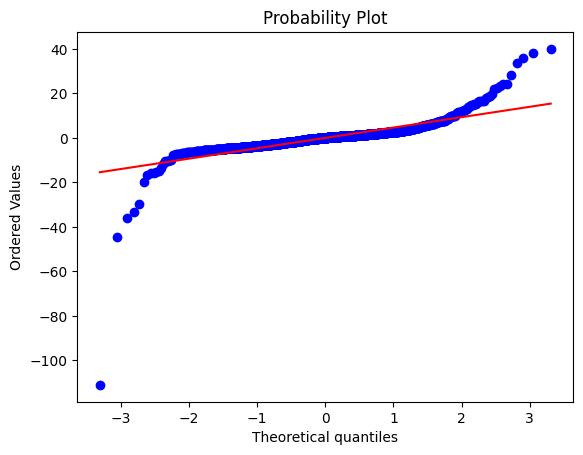

In [ ]:
probplot(y_test-y_pred,dist='norm',plot=plt)
plt.show()

#using OLS Regression



In [ ]:
import statsmodels.api as sm
import pandas as pd

#Add a constant to independent variables

In [ ]:
X_train_sm = sm.add_constant(x_train)
X_test_sm = sm.add_constant(x_test)
X_train_sm

,const,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),fuel_E,fuel_N,fuel_X,...,vehicle_class_PICKUP TRUCK - STANDARD,vehicle_class_SPECIAL PURPOSE VEHICLE,vehicle_class_STATION WAGON - MID-SIZE,vehicle_class_STATION WAGON - SMALL,vehicle_class_SUBCOMPACT,vehicle_class_SUV - SMALL,vehicle_class_SUV - STANDARD,vehicle_class_TWO-SEATER,vehicle_class_VAN - CARGO,vehicle_class_VAN - PASSENGER
0,1.0,-0.121493,0.205342,-0.335091,-0.429379,-0.376817,0.217020,-0.228023,0.0,-0.988221,...,-0.278763,-0.097823,-0.079386,-0.19055,3.31785,-0.444577,-0.332455,-0.264756,-0.048737,-0.092387
1,1.0,0.614166,0.205342,0.607277,0.564406,0.592571,-0.756204,-0.228023,0.0,1.011919,...,-0.278763,-0.097823,-0.079386,-0.19055,-0.30140,-0.444577,-0.332455,-0.264756,-0.048737,-0.092387
2,1.0,-0.121493,0.205342,0.350268,-0.022831,0.246361,-0.478140,-0.228023,0.0,-0.988221,...,-0.278763,-0.097823,-0.079386,-0.19055,-0.30140,-0.444577,-0.332455,-0.264756,-0.048737,-0.092387
3,1.0,0.172770,0.205342,-0.363647,-0.519723,-0.411438,0.217020,-0.228023,0.0,-0.988221,...,-0.278763,-0.097823,-0.079386,-0.19055,-0.30140,-0.444577,-0.332455,3.777056,-0.048737,-0.092387
4,1.0,-0.857153,-0.885139,-0.706327,-0.926271,-0.792268,0.634115,-0.228023,0.0,-0.988221,...,-0.278763,-0.097823,12.596653,-0.19055,-0.30140,-0.444577,-0.332455,-0.264756,-0.048737,-0.092387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5903,1.0,-0.857153,-0.885139,-0.649213,-0.745583,-0.688405,0.495083,-0.228023,0.0,-0.988221,...,-0.278763,-0.097823,-0.079386,-0.19055,3.31785,-0.444577,-0.332455,-0.264756,-0.048737,-0.092387
5904,1.0,0.246336,0.205342,-0.563544,-0.790755,-0.653784,0.495083,-0.228023,0.0,1.011919,...,-0.278763,-0.097823,-0.079386,-0.19055,-0.30140,-0.444577,-0.332455,-0.264756,-0.048737,-0.092387
5905,1.0,0.246336,0.205342,-0.249421,-0.113175,-0.203712,-0.061044,-0.228023,0.0,1.011919,...,-0.278763,-0.097823,-0.079386,-0.19055,-0.30140,-0.444577,3.007926,-0.264756,-0.048737,-0.092387
5906,1.0,-0.489323,-0.885139,-0.877666,-0.745583,-0.826889,0.773147,-0.228023,0.0,1.011919,...,-0.278763,-0.097823,-0.079386,-0.19055,-0.30140,2.249330,-0.332455,-0.264756,-0.048737,-0.092387


In [ ]:
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

#Create and fit the OLS model

In [ ]:
model=sm.OLS(y_train,X_train_sm).fit()
model

In [ ]:
print(model.summary())

                             OLS Regression Results                            
Dep. Variable:     CO2 Emissions(g/km)   R-squared:                       0.993
Model:                             OLS   Adj. R-squared:                  0.993
Method:                  Least Squares   F-statistic:                 3.607e+04
Date:                 Wed, 04 Dec 2024   Prob (F-statistic):               0.00
Time:                         16:23:58   Log-Likelihood:                -17655.
No. Observations:                 5908   AIC:                         3.536e+04
Df Residuals:                     5883   BIC:                         3.553e+04
Df Model:                           24                                         
Covariance Type:             nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [ ]:
# import statsmodels.api as sm
# import pandas as pd

# # Create and fit the OLS model with the original data
# model = sm.OLS(y_train, sm.add_constant(x_train))  # Correct order
# results = model.fit()

# print(results.summary())

In [ ]:
p_values=model.pvalues
p_values

,0
const,0.000000e+00
Engine Size(L),8.190772e-01
Cylinders,8.904250e-27
Fuel Consumption City (L/100 km),1.150958e-16
Fuel Consumption Hwy (L/100 km),8.532709e-17
Fuel Consumption Comb (L/100 km),5.819608e-08
Fuel Consumption Comb (mpg),2.991500e-146
fuel_E,0.000000e+00
fuel_N,0.000000e+00
fuel_X,0.000000e+00


dropping features having p_calues greater than 0.05

In [ ]:
mask=p_values>0.05
columns_to_drop=p_values[mask].index
columns_to_drop

Index(['Engine Size(L)', 'vehicle_class_MID-SIZE', 'vehicle_class_MINIVAN',
       'vehicle_class_STATION WAGON - MID-SIZE',
       'vehicle_class_STATION WAGON - SMALL', 'vehicle_class_SUBCOMPACT',
       'vehicle_class_SUV - SMALL'],
      dtype='object')

In [ ]:
# Convert column names in both DataFrames and columns_to_drop to lowercase
x_train.columns = x_train.columns.str.lower()
x_test.columns = x_test.columns.str.lower()
columns_to_drop = [col.lower() for col in columns_to_drop]

# Filter columns_to_drop to only include columns present in X_train
columns_to_drop = [col for col in columns_to_drop if col in X_train.columns]

# Now drop the columns
X_train = X_train.drop(columns_to_drop, axis=1)

In [ ]:

# Replace this with your actual data loading and splitting logic
df = pd.DataFrame({'col1': [1, 2, 3], 'col2': [4, 5, 6]})

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = df[['col1', 'col2']]  # Features
y = df['col1']  # Target variable (replace with your actual target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can proceed with your original code
# Convert column names in both DataFrames and columns_to_drop to lowercase
X_train.columns = X_train.columns.str.lower()
X_test.columns = X_test.columns.str.lower()
columns_to_drop = [col.lower() for col in columns_to_drop]

# Filter columns_to_drop to only include columns present in X_train
columns_to_drop = [col for col in columns_to_drop if col in X_train.columns]

# Now drop the columns
X_train = X_train.drop(columns_to_drop, axis=1)

In [ ]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=LR.predict(x_test)
y_pred

array([255.66397853, 339.92281685, 325.62941614, ..., 182.32003351,
       239.69519016, 192.14711357])

In [ ]:
mean_squared_error(y_test,y_pred)

33.3140603579278

In [ ]:
R2=r2_score(y_test,y_pred)
R2

0.9903146311088332

regularization using lasso and ridge

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Define a range of alpha values
#alphas = [list of alphas to tune]
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [ ]:
# Create ridge model
ridge= Ridge()

# Cross validation-Create KFold object
kfold = 5  # Adjust n_splits as needed

# Create GridSearchCV object
model_cv = GridSearchCV(estimator= ridge,param_grid=params, cv=kfold, scoring='neg_mean_squared_error',return_train_score=True,verbose=1)

 #Fit the grid search to your data
model_cv.fit(x_train_scaled, y_train)


NameError: name 'x_train_scaled' is not defined

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# Assuming x_train contains your training data
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your training data and transform it
x_train_scaled = scaler.fit_transform(x_train)

# Define a range of alpha values
#alphas = [list of alphas to tune]
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


# Create ridge model
ridge= Ridge()

# Cross validation-Create KFold object
kfold = 5  # Adjust n_splits as needed

# Create GridSearchCV object
model_cv = GridSearchCV(estimator= ridge,param_grid=params, cv=kfold, scoring='neg_mean_squared_error',return_train_score=True,verbose=1)

 #Fit the grid search to your data
model_cv.fit(x_train_scaled, y_train) # Now x_train_scaled is defined

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results=cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005353,0.000452,0.001283,0.000212,0.0001,{'alpha': 0.0001},-21.008204,-28.073132,-24.394305,-19.296896,...,-23.848753,3.280503,15,-23.636349,-22.065848,-22.795872,-24.184599,-22.290317,-22.994597,0.803247
1,0.004738,0.000229,0.001137,0.000108,0.0010,{'alpha': 0.001},-21.008185,-28.073141,-24.394303,-19.296900,...,-23.848741,3.280499,14,-23.636349,-22.065848,-22.795872,-24.184599,-22.290317,-22.994597,0.803247
2,0.004681,0.000098,0.001133,0.000083,0.0100,{'alpha': 0.01},-21.007997,-28.073229,-24.394278,-19.296943,...,-23.848620,3.280458,13,-23.636349,-22.065848,-22.795872,-24.184599,-22.290319,-22.994598,0.803247
3,0.005674,0.002171,0.001135,0.000066,0.0500,{'alpha': 0.05},-21.007155,-28.073626,-24.394189,-19.297128,...,-23.848125,3.280312,12,-23.636355,-22.065852,-22.795883,-24.184605,-22.290354,-22.994610,0.803242
4,0.006588,0.002460,0.001175,0.000171,0.1000,{'alpha': 0.1},-21.006097,-28.074130,-24.394115,-19.297352,...,-23.847589,3.280197,10,-23.636371,-22.065866,-22.795912,-24.184623,-22.290448,-22.994644,0.803228


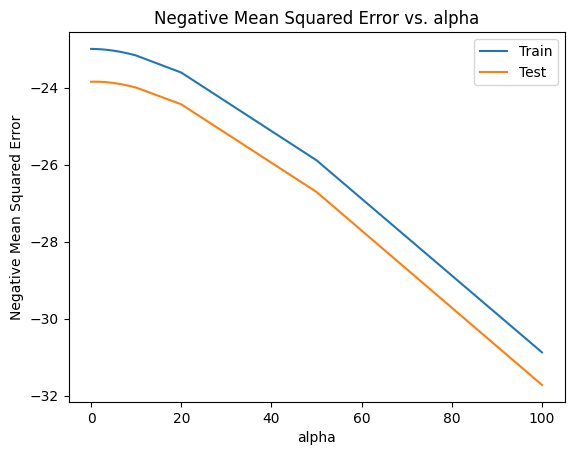

In [ ]:
#plotting mean test and train scores with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype(float)
#plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Squared Error')
plt.title('Negative Mean Squared Error vs. alpha')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
alpha=model_cv.best_params_['alpha']
alpha
ridge=Ridge(alpha=alpha)
ridge.fit(x_train,y_train)
ridge.coef_

array([-3.10209388e-02,  2.09039129e+00,  2.42209041e+01,  1.28235161e+01,
        2.20341319e+01, -5.45372034e+00, -3.01173508e+01,  0.00000000e+00,
       -1.49032213e+01, -1.49391126e+01,  3.67142625e-01,  1.17185277e-01,
       -2.07095247e-01,  6.87989758e-02,  4.37925447e-01,  3.58032976e-01,
        2.92884316e-01,  4.17570847e-02, -1.69549252e-02,  1.04761316e-02,
        1.59429517e-01,  3.01252195e-01,  2.08541643e-01, -6.87119446e-01,
       -4.58815952e-01])

In [ ]:
y_pred_ridge=ridge.predict(x_test)

In [ ]:
# Evaluate the model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
mae_ridge=mean_absolute_error(y_test, y_pred_ridge)

# Print the results
print("ridge Regression - MSE:", mse_ridge)
print("ridge Regression - R2:", r2_ridge)
print("ridge regression-MAE:", mae_ridge)

ridge Regression - MSE: 33.27152560834353
ridge Regression - R2: 0.9903269972009875
ridge regression-MAE: 3.116330655061574
